In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import EnsembleVoteClassifier

In [3]:
#validation & tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

In [4]:
print(os.getcwd())
os.chdir('D:/OneDrive/BLOGS/League of Legends')
print(os.getcwd())

C:\Users\Jinhang Jiang
D:\OneDrive\BLOGS\League of Legends


In [373]:
info = pd.read_csv("high_diamond_ranked_10min.csv")

In [295]:
data = pd.read_csv("high_diamond_ranked_10min.csv")

In [372]:
info

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,blueGoldAdv,blueKDA,redKDA,blueKDADiff,blueDiffNeg,blueDiffPos
0,4519157822,0,28,2,1,9,6,11,0,0,...,-0.256228,-0.013342,19.7,0.052293,0,3.3333,1.5556,1.7777,0,0
1,4523371949,0,12,1,0,5,5,5,0,0,...,1.191254,0.593342,24.0,0.758619,0,2.0000,1.4000,0.6000,0,0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0.483614,0.520436,20.3,0.533909,0,1.0000,3.5714,-2.5714,0,0
3,4524384067,0,43,1,0,4,5,5,1,0,...,0.544350,-0.013863,23.5,-0.007406,0,1.8000,3.7500,-1.9500,0,0
4,4436033771,0,75,4,0,6,6,6,0,0,...,0.415133,-0.137283,22.5,0.613731,0,2.0000,2.1667,-0.1667,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,-1.020936,-1.303263,22.9,-0.833801,0,3.0000,1.5714,1.4286,0,0
9875,4527797466,1,54,0,0,6,4,8,1,1,...,-0.312888,-0.479942,20.6,-0.692938,0,3.5000,1.1667,2.3333,0,0
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0.990702,0.959957,26.1,1.227490,0,1.5714,3.0000,-1.4286,0,0
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0.347874,0.547516,24.7,-0.798921,0,1.6667,2.0000,-0.3333,0,0


In [297]:
info.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [426]:
info.blueWins.value_counts(normalize=True)

0    0.500962
1    0.499038
Name: blueWins, dtype: float64

# Plots

<BarContainer object of 2 artists>

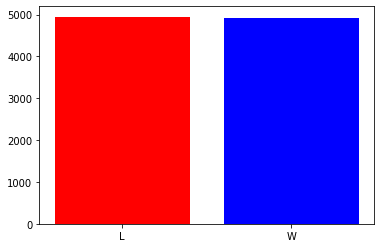

In [299]:
plt.bar(info.blueWins.unique(),info.blueWins.value_counts(),color=("r","b"),tick_label=("L","W"))

Text(0, 0.5, 'red kills')

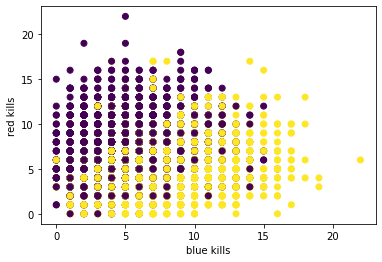

In [427]:
plt.scatter(info.blueKills,info.redKills,c=info.blueWins)
plt.xlabel("blue kills")
plt.ylabel("red kills")

Text(0, 0.5, 'red assists')

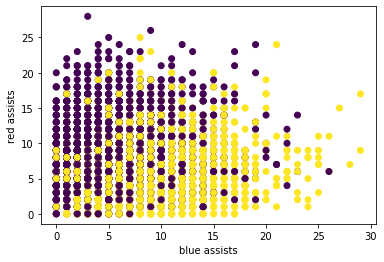

In [428]:
plt.scatter(info.blueAssists,info.redAssists,c=info.blueWins)
plt.xlabel("blue assists")
plt.ylabel("red assists")

In [302]:
info.blueTotalGold.where(info.blueWins==0).sort_values(ascending=False).head(2)

9608    21055.0
6137    20887.0
Name: blueTotalGold, dtype: float64

Text(0, 0.5, 'red gold')

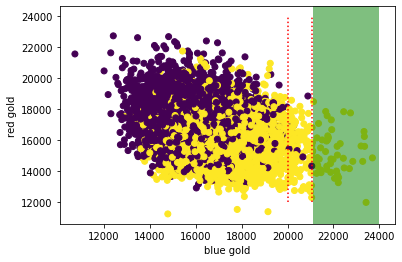

In [430]:
plt.scatter(data.blueTotalGold,data.redTotalGold,c=data.blueWins)
plt.vlines(21056,12000,24000,color= "red", linestyle=':')
plt.vlines(20000,12000,24000,color= "red", linestyle=':')
plt.axvspan(21100, 24000, color='g', alpha=0.5, lw=0)
plt.xlabel("blue gold")
plt.ylabel("red gold")

In [304]:
print(info.blueGoldDiff.where(info.blueWins==0).sort_values(ascending=False).head(1))
print(info.blueGoldDiff.where(info.blueWins==1).sort_values(ascending=True).head(1))

9608    6744.0
Name: blueGoldDiff, dtype: float64
8459   -6324.0
Name: blueGoldDiff, dtype: float64


Text(0.5, 0, 'team gold')

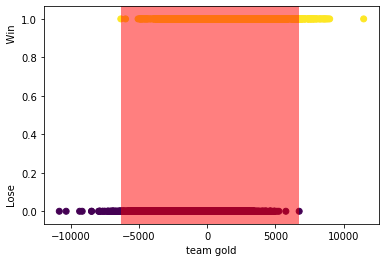

In [434]:
plt.scatter(data.blueGoldDiff,data.blueWins,c=data.blueWins)
plt.axvspan(-6324.0,6744.0,color='r',alpha=0.5,lw=0)
plt.ylabel("Lose                                             Win")
plt.xlabel("team gold")

Text(0, 0.5, 'red vision')

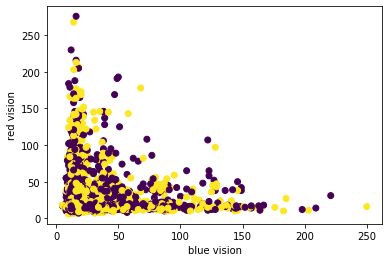

In [439]:
plt.scatter(info.blueWardsPlaced,info.redWardsPlaced,c=info.blueWins)
plt.xlabel("blue vision")
plt.ylabel("red vision")

In [307]:
info.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [308]:
corr_matrix=info.drop(["gameId",'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],axis=1).corr(method='pearson')
corr_matrix.iloc[:,0]

blueWins                        1.000000
blueWardsPlaced                 0.000087
blueWardsDestroyed              0.044247
blueFirstBlood                  0.201769
blueKills                       0.337358
blueDeaths                     -0.339297
blueAssists                     0.276685
blueEliteMonsters               0.221944
blueDragons                     0.213768
blueHeralds                     0.092385
blueTowersDestroyed             0.115566
blueTotalGold                   0.417213
blueAvgLevel                    0.357820
blueTotalExperience             0.396141
blueTotalMinionsKilled          0.224909
blueTotalJungleMinionsKilled    0.131445
blueGoldDiff                    0.511119
blueExperienceDiff              0.489558
blueCSPerMin                    0.224909
blueGoldPerMin                  0.417213
Name: blueWins, dtype: float64

In [309]:
data.drop(["gameId",'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],axis=1).describe()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551
std,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000
25%,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000
50%,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000
75%,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000
max,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000


In [310]:
data.blueWins.where(((data.blueKills+data.blueAssists)/data.blueDeaths)>=3).dropna().value_counts(normalize=True)

1.0    0.765084
0.0    0.234916
Name: blueWins, dtype: float64

In [311]:
data.blueWins.where(data.blueTowersDestroyed>=1).dropna().value_counts(normalize=True)

1.0    0.75431
0.0    0.24569
Name: blueWins, dtype: float64

In [312]:
data.blueWins.where(data.blueKills>=8).dropna().value_counts(normalize=True)

1.0    0.69858
0.0    0.30142
Name: blueWins, dtype: float64

# Feature Engineering

In [388]:
info["blueKDA"]=3
for i in range(0,len(info)):
    if data.blueDeaths[i] != 0:
        info["blueKDA"][i]=((data.blueKills[i]+data.blueAssists[i])/data.blueDeaths[i]).round(4)
    else:
        0

In [390]:
info["redKDA"]=3
for i in range(0,len(info)):
    if data.redDeaths[i]!=0:
        info["redKDA"][i] = ((data.redKills[i]+data.redAssists[i])/data.redDeaths[i]).round(4)
    else:
        0

In [391]:
info["blueKDADiff"]=info["blueKDA"]-info["redKDA"]

In [378]:
info["blueGoldAdv"]=3
for i in range(0,len(info)):
    if info["blueTotalGold"][i] >= info["blueTotalGold"][3464]:
        info["blueGoldAdv"][i] = 1
    else:
        info["blueGoldAdv"][i] = 0

In [379]:
info["blueDiffNeg"]=3
for i in range(0,len(info)):
    if info["blueGoldDiff"][i] <= info["blueGoldDiff"][8459]:
        info["blueDiffNeg"][i] = 1
    else:
        info["blueDiffNeg"][i] = 0

In [380]:
info["blueDiffPos"]=3
for i in range(0,9879):
    if info["blueGoldDiff"][i] >= info["blueGoldDiff"][9608]:
        info["blueDiffPos"][i] = 1
    else:
        info["blueDiffPos"][i] = 0

In [326]:
cols=['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin']
info[cols]

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,0.460179,6.6,-0.740639,-0.992782,36,0.256228,0.013342,19.5,0.460179
1,4523371949,0,12,1,0,5,5,5,0,0,...,0,-1.166792,6.6,-1.385391,-1.953558,43,-1.191254,-0.593342,17.4,-1.166792
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,-0.254307,6.4,-1.422043,-1.404543,46,-0.483614,-0.520436,18.6,-0.254307
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,-0.876959,7.0,0.021567,-0.718275,55,-0.544350,0.013863,20.1,-0.876959
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,-0.067382,7.0,0.512211,-0.306513,57,-0.415133,0.137283,21.0,-0.067382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,0.821656,7.2,0.865408,-0.260762,69,1.020936,1.303263,21.1,0.821656
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,-0.172894,7.2,1.105315,0.745765,48,0.312888,0.479942,23.3,-0.172894
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,-0.391082,7.0,0.086541,-0.306513,45,-0.990702,-0.959957,21.0,-0.391082
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,-1.331573,6.6,-0.582367,0.334004,48,-0.347874,-0.547516,22.4,-1.331573


In [392]:
cols = ['blueTotalGold','blueTotalExperience','blueTotalMinionsKilled',
        'blueGoldDiff','blueExperienceDiff','blueGoldPerMin',
        'redTotalGold','redTotalExperience','redTotalMinionsKilled',
        'redGoldDiff','redExperienceDiff','redGoldPerMin']
standard = StandardScaler()
info[cols]=standard.fit_transform(info[cols])

In [393]:
info_x=info.drop(["gameId","blueWins"],axis=1)
info_y=info.blueWins

In [329]:
#info_x.to_csv("X.csv",index=False)
#info_y.to_csv("Y.csv",index=False)

In [423]:
cv=KFold(n_splits = 5, random_state=2022,shuffle=True)

In [702]:
#train, holdout = train_test_split(info,random_state = 2020, test_size = 0.3)

In [703]:
#train.blueWins.value_counts()

0    3509
1    3406
Name: blueWins, dtype: int64

In [704]:
#holdout.blueWins.value_counts()

1    1524
0    1440
Name: blueWins, dtype: int64

In [705]:
#train.to_csv("train.csv",index=False)
#holdout.to_csv("holdout.csv",index=False)

In [706]:
#y_train = train.blueWins
#X_train = train.drop(["gameId","blueWins"],axis=1)

In [707]:
#y_test = holdout.blueWins
#X_test = holdout.drop(["gameId","blueWins"],axis=1)

# KNN

In [246]:
np.sqrt(len(info_x))

99.39315871829409

In [248]:
knn_params = {"n_neighbors" :np.arange(95,105),
             "weights" : ["distance"],
             "algorithm" : ["ball_tree"] , #,"kd_tree","brute"
             "leaf_size":[1,2]}

In [394]:
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, knn_params,cv=5,verbose=2,n_jobs=-1)
grid_knn.fit(info_x,info_y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   53.7s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree'], 'leaf_size': [1, 2],
                         'n_neighbors': array([ 95,  96,  97,  98,  99, 100, 101, 102, 103, 104]),
                         'weights': ['distance']},
             verbose=2)

In [395]:
knn_best_params=grid_knn.best_params_
knn_best_params

{'algorithm': 'ball_tree',
 'leaf_size': 1,
 'n_neighbors': 98,
 'weights': 'distance'}

In [396]:
knn = KNeighborsClassifier(algorithm="ball_tree",n_neighbors=98,weights="distance",leaf_size=1)

In [397]:
np.mean(cross_val_score(knn,info_x,info_y,cv=cv,scoring="accuracy",n_jobs=-1))

0.7061440065597294

# Logistic Regression

In [50]:
log_params = {"penalty":["l1","l2","elasticnet"],
              "solver":['newton-cg', 'lbfgs', 'sag', 'saga'],
             "C":[1,5,10,20,30,50,100],
             "warm_start":[True,False]}

In [51]:
logreg=LogisticRegression()

In [52]:
log_grid = GridSearchCV(logreg,log_params,cv=cv,verbose=2,n_jobs=-1)

In [398]:
log_grid.fit(info_x,info_y)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed:   40.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 20, 30, 50, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
                         'warm_start': [True, False]},
             verbose=2)

In [399]:
log_grid.best_params_

{'C': 50, 'penalty': 'l2', 'solver': 'lbfgs', 'warm_start': True}

In [409]:
logreg=LogisticRegression(penalty="l2",solver="sag",C=50, warm_start=False)

# CatBoostClassifier

In [400]:
cat_params = {"learning_rate":[0.005],
              "depth":[6,8]}

In [404]:
cat = CatBoostClassifier()

In [405]:
cat_grid = GridSearchCV(cat,cat_params,cv=cv)

In [406]:
cat_grid.fit(info_x,info_y)

0:	learn: 0.6916092	total: 21ms	remaining: 21s
1:	learn: 0.6899828	total: 31.1ms	remaining: 15.5s
2:	learn: 0.6885101	total: 40.8ms	remaining: 13.6s
3:	learn: 0.6871517	total: 48.2ms	remaining: 12s
4:	learn: 0.6855622	total: 53ms	remaining: 10.6s
5:	learn: 0.6841290	total: 58.4ms	remaining: 9.67s
6:	learn: 0.6825763	total: 63.3ms	remaining: 8.98s
7:	learn: 0.6810468	total: 68.2ms	remaining: 8.46s
8:	learn: 0.6795159	total: 73.3ms	remaining: 8.08s
9:	learn: 0.6779922	total: 78.4ms	remaining: 7.76s
10:	learn: 0.6765636	total: 83.4ms	remaining: 7.5s
11:	learn: 0.6750643	total: 88.5ms	remaining: 7.28s
12:	learn: 0.6736501	total: 93.4ms	remaining: 7.09s
13:	learn: 0.6723131	total: 98.3ms	remaining: 6.92s
14:	learn: 0.6710285	total: 103ms	remaining: 6.79s
15:	learn: 0.6697256	total: 108ms	remaining: 6.66s
16:	learn: 0.6683202	total: 113ms	remaining: 6.55s
17:	learn: 0.6671108	total: 119ms	remaining: 6.47s
18:	learn: 0.6659717	total: 123ms	remaining: 6.37s
19:	learn: 0.6646475	total: 128ms	re

GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=False),
             estimator=<catboost.core.CatBoostClassifier object at 0x0000020F2F2E01C8>,
             param_grid={'depth': [6, 8], 'learning_rate': [0.005]})

In [407]:
cat_grid.best_params_

{'depth': 8, 'learning_rate': 0.005}

In [408]:
cat = CatBoostClassifier(learning_rate=0.005,depth=8,verbose=False)

# SVC

In [412]:
svc_params={'kernel':['poly','sigmoid'],
           'C':[1,10,20,50,100]}

In [413]:
svc=SVC()

In [414]:
svc_grid=GridSearchCV(svc,svc_params,cv=cv,verbose=2,n_jobs=-1)

In [415]:
svc_grid.fit(info_x,info_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=False),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 20, 50, 100],
                         'kernel': ['poly', 'sigmoid']},
             verbose=2)

In [416]:
svc_grid.best_params_

{'C': 20, 'kernel': 'poly'}

In [444]:
svc=SVC(kernel="poly",probability=True,C=20)

In [90]:
np.mean(cross_val_score(svc,info_x,info_y,cv=cv,scoring="accuracy",n_jobs=-1))

0.728008404653308

# AdaClassifier

In [56]:
ada_params={"learning_rate":[0.05,0.1,0.2,0.5,1],
           "algorithm":['SAMME', 'SAMME.R'],
           "n_estimators":[50,100,150,500]}

In [57]:
ada = AdaBoostClassifier()

In [58]:
ada_grid = GridSearchCV(ada,ada_params,cv=cv,verbose=2)

In [59]:
ada_grid.fit(info_x,info_y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] algorithm=SAMME, learning_rate=0.05, n_estimators=50 ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  algorithm=SAMME, learning_rate=0.05, n_estimators=50, total=   0.7s
[CV] algorithm=SAMME, learning_rate=0.05, n_estimators=50 ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  algorithm=SAMME, learning_rate=0.05, n_estimators=50, total=   0.7s
[CV] algorithm=SAMME, learning_rate=0.05, n_estimators=50 ............
[CV]  algorithm=SAMME, learning_rate=0.05, n_estimators=50, total=   0.7s
[CV] algorithm=SAMME, learning_rate=0.05, n_estimators=50 ............
[CV]  algorithm=SAMME, learning_rate=0.05, n_estimators=50, total=   0.7s
[CV] algorithm=SAMME, learning_rate=0.05, n_estimators=50 ............
[CV]  algorithm=SAMME, learning_rate=0.05, n_estimators=50, total=   0.7s
[CV] algorithm=SAMME, learning_rate=0.05, n_estimators=100 ...........
[CV]  algorithm=SAMME, learning_rate=0.05, n_estimators=100, total=   1.4s
[CV] algorithm=SAMME, learning_rate=0.05, n_estimators=100 ...........
[CV]  algorithm=SAMME, learning_rate=0.05, n_estimators=100, total=   1.5s
[CV] algorithm=SAMME, learning_rate=0.05, n_estimators=100 ...........
[CV]  algorithm=SAMME, learning_rate=0.05, n_estimators=100, total=   1.7s
[CV] algorithm=SAMME, learning_rate=0.05, n_estimator

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 11.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=False),
             estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.05, 0.1, 0.2, 0.5, 1],
                         'n_estimators': [50, 100, 150, 500]},
             verbose=2)

In [60]:
ada_grid.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.05, 'n_estimators': 150}

In [445]:
ada_best_params = {"learning_rate":0.05,
                  "algorithm":"SAMME.R",
                  "n_estimators":150}

In [446]:
ada=AdaBoostClassifier(**ada_best_params)

In [67]:
np.mean(cross_val_score(ada,info_x,info_y,cv=cv,scoring="accuracy",n_jobs=-1))

0.732361041357044

# Random Forest

In [40]:
rdf_params={"criterion":["entropy"],#gini
           "max_depth":[8], #2,4,6
           "min_samples_split":[4],#2,6
           "max_features":["sqrt"]} #log2

In [41]:
rdf=RandomForestClassifier()

In [42]:
rdf_grid=GridSearchCV(rdf,rdf_params,cv=cv,verbose=2,n_jobs=-1)

In [43]:
rdf_grid.fit(info_x,info_y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   35.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6]},
             verbose=2)

In [44]:
rdf_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_split': 4}

In [447]:
rdf=RandomForestClassifier(criterion="entropy",max_depth=8,max_features="sqrt",min_samples_split=4)

In [47]:
np.mean(cross_val_score(rdf,info_x,info_y,cv=cv,scoring="accuracy",n_jobs=-1))

0.7297290524265874

# XGBClassifier

In [68]:
xgb_params = {"eta":[0.01,0.05,0.1],
              "max_depth":[2,4,6,8],
              "objective":["binary:logistic"],
             "lambda":[1.20,50],
             "alpha":[0,20],
             "subsample":[0.3,0.7,0.8,1]}

In [69]:
xgb=XGBClassifier()

In [70]:
xgb_grid=GridSearchCV(xgb,xgb_params,cv=cv,verbose=2,n_jobs=-1)

In [71]:
xgb_grid.fit(info_x,info_y)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  6.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, m...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                          

In [72]:
xgb_grid.best_params_

{'alpha': 0,
 'eta': 0.05,
 'lambda': 50,
 'max_depth': 2,
 'objective': 'binary:logistic',
 'subsample': 1}

In [448]:
xgb=XGBClassifier(eta=0.05,max_depth=2,objective="binary:logistic",reg_lambda=50)

# Ensemble, Stacking

In [424]:
eclf = EnsembleVoteClassifier(clfs=[cat,logreg, knn, svc,ada,rdf,xgb], weights=[1,1,1,1,1,1,1])
labels = ['CatBoost','Logistic Regression', 'KNN', 'SVC','AdaBoost',"Random Forest",'XGBoost','Ensemble']
for clf, label in zip([cat,logreg, knn, svc, ada, rdf, xgb,eclf], labels):

    scores = cross_val_score(clf, info_x, info_y, 
                             cv=cv, 
                             scoring='accuracy',
                             n_jobs=-1)

    print("[%s] Accuracy: %0.6f (+/- %0.6f) Best: %0.6f " 
          % (label,scores.mean(), scores.std(), scores.max()))

[CatBoost] Accuracy: 0.729832 (+/- 0.010683) Best: 0.739372 
[Logistic Regression] Accuracy: 0.730641 (+/- 0.009936) Best: 0.739879 
[KNN] Accuracy: 0.706853 (+/- 0.013521) Best: 0.732794 
[SVC] Accuracy: 0.721227 (+/- 0.012242) Best: 0.735324 
[AdaBoost] Accuracy: 0.732767 (+/- 0.011828) Best: 0.744433 
[Random Forest] Accuracy: 0.728313 (+/- 0.007885) Best: 0.738866 
[XGBoost] Accuracy: 0.733374 (+/- 0.010998) Best: 0.746964 
[Ensemble] Accuracy: 0.730237 (+/- 0.009251) Best: 0.739372 


In [467]:
X_train, X_test, y_train, y_test = train_test_split(info_x,info_y,random_state=666,test_size=0.3)

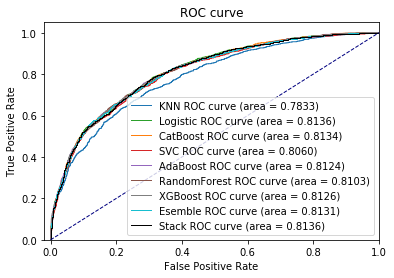

In [468]:
plt.figure()
lw = 1
#knn
knn.fit(X_train,y_train)
knn_pred = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test,knn_pred[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='tab:blue',
             lw=lw, label='KNN ROC curve (area = %0.4f)' % roc_auc)
#logreg
logreg.fit(X_train,y_train)
log_pred = logreg.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test,log_pred[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='tab:green',
             lw=lw, label='Logistic ROC curve (area = %0.4f)' % roc_auc)

#cat
cat.fit(X_train,y_train)
cat_pred = cat.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test,cat_pred[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='tab:orange',
             lw=lw, label='CatBoost ROC curve (area = %0.4f)' % roc_auc)

#svc
svc.fit(X_train,y_train)
svc_pred = svc.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test,svc_pred[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='tab:red',
             lw=lw, label='SVC ROC curve (area = %0.4f)' % roc_auc)

#ada
ada.fit(X_train,y_train)
ada_pred = ada.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test,ada_pred[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='tab:purple',
             lw=lw, label='AdaBoost ROC curve (area = %0.4f)' % roc_auc)

#rdf
rdf.fit(X_train,y_train)
rdf_pred = rdf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test,rdf_pred[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='tab:brown',
             lw=lw, label='RandomForest ROC curve (area = %0.4f)' % roc_auc)

#xgb
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test,xgb_pred[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='tab:gray',
             lw=lw, label='XGBoost ROC curve (area = %0.4f)' % roc_auc)

#eclf
eclf.fit(X_train,y_train)
eclf_pred = eclf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test,eclf_pred[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='tab:cyan',
             lw=lw, label='Esemble ROC curve (area = %0.4f)' % roc_auc)

#stack
stack.fit(X_train,y_train)
stack_pred = stack.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test,stack_pred[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='black',
             lw=lw, label='Stack ROC curve (area = %0.4f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [78]:
estimators = [
    ('knn', KNeighborsClassifier(algorithm= 'ball_tree', n_neighbors=98, weights= 'distance',leaf_size=1)),
    ('rdf', RandomForestClassifier(criterion="entropy",max_depth=8,max_features="sqrt",min_samples_split=4)),
    ('svc',SVC(kernel="poly",probability=True,C=20)),
    ('cat',CatBoostClassifier(learning_rate=0.005,depth=8,verbose=False)),
    ('ada',AdaBoostClassifier(learning_rate=0.05,algorithm="SAMME.R",n_estimators=150)),
    ('logreg',LogisticRegression(penalty="l2",solver="sag",warm_start=False,C=50)),
    ('xgb',XGBClassifier(eta=0.05,max_depth=2,objective="binary:logistic",reg_lambda=50))
]


stack = StackingClassifier(estimators=estimators, 
                           final_estimator=LogisticRegression(penalty="l2",solver="sag",warm_start=False,C=50))

In [79]:
stack_score = cross_val_score(stack, info_x, info_y,cv=cv,scoring='accuracy',n_jobs=-1)

0.7321588171987906

In [89]:
print(np.mean(stack_score),np.std(stack_score))
print(stack_score.max())

0.7321588171987906 0.005170871168699806
0.7388663967611336


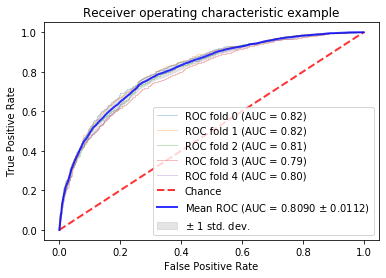

In [440]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(info_x, info_y)):
    stack.fit(info_x.iloc[train], info_y.iloc[train])
    viz = plot_roc_curve(stack, info_x.iloc[test], info_y.iloc[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

# False Prediction Analysis

In [469]:
stack.fit(X_train,y_train)
stack_pred = stack.predict_proba(X_test)

In [470]:
X_test["blueWins"]=y_test
X_test["Prediction"]=stack_pred[:,1].round().astype(int)

In [471]:
X_test["Error"] = 3
for i in X_test.index:
    if X_test["blueWins"][i] != X_test["Prediction"][i]:
        X_test["Error"][i] = 1
    else:
        X_test["Error"][i] = 0

In [473]:
X_test.Error.value_counts()

0    2165
1     799
Name: Error, dtype: int64

In [474]:
Error = X_test.where(X_test["Error"]==1).dropna()
Correct = X_test.where(X_test["Error"]==0).dropna()
Error_normal = data.loc[Error.index]
Correct_normal = data.loc[Correct.index]
data_normal = data.loc[X_test.index]

0.0    0.519399
1.0    0.480601
Name: blueWins, dtype: float64


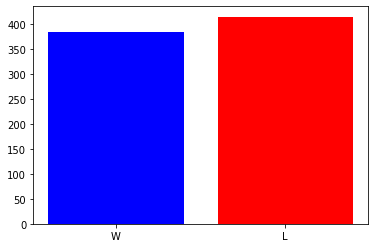

In [475]:
plt.bar(Error.blueWins.unique(),Error.blueWins.value_counts(),
        color=("r","b"),tick_label=("L","W"))
print(Error.blueWins.value_counts(normalize=True))

Text(0, 0.5, 'red gold')

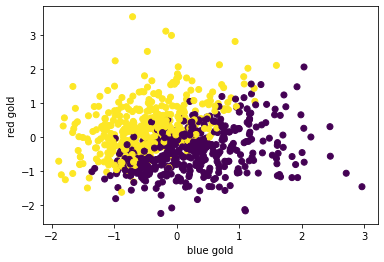

In [476]:
plt.scatter(Error.blueTotalGold,Error.redTotalGold,c=Error.blueWins)
plt.xlabel("blue gold")
plt.ylabel("red gold")

Text(0, 0.5, 'red experience')

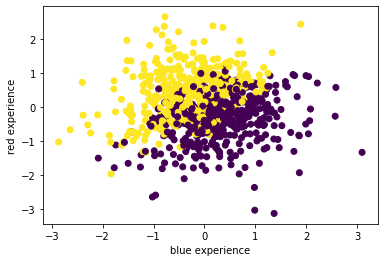

In [477]:
plt.scatter(Error.blueTotalExperience, Error.redTotalExperience, c=Error.blueWins)
plt.xlabel("blue experience")
plt.ylabel("red experience")

In [478]:
Error_normal

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
4433,4516589637,1,14,1,0,9,8,8,0,0,...,0,17654,7.4,19392,203,59,978,1076,20.3,1765.4
1249,4517512393,1,14,4,1,9,8,5,1,1,...,0,17770,7.2,19069,213,66,1918,1739,21.3,1777.0
3860,4522690291,1,12,1,1,7,5,7,1,0,...,0,15580,7.4,19659,231,61,-846,1893,23.1,1558.0
7547,4486105297,1,18,2,1,7,10,9,0,0,...,0,18159,6.8,17816,229,46,2005,1736,22.9,1815.9
6729,4477434796,0,17,3,0,8,2,15,0,0,...,0,15262,6.8,17413,253,50,-1131,-1370,25.3,1526.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,4519668670,0,136,4,1,9,5,9,0,0,...,0,14714,6.4,15819,154,48,-2986,-2450,15.4,1471.4
6334,4487018877,1,16,4,1,5,8,4,1,1,...,0,17363,7.2,18738,217,49,1399,1727,21.7,1736.3
905,4516044973,0,13,0,0,5,4,3,1,1,...,0,16002,7.2,18678,233,60,41,1008,23.3,1600.2
9241,4505233035,1,39,0,1,5,7,4,0,0,...,0,17067,7.0,18365,222,57,820,575,22.2,1706.7


In [479]:
print("Early JGDiff Avg: %0.4f"
      %(data.blueTotalJungleMinionsKilled-data.redTotalJungleMinionsKilled).mean())
print("Early JGDiff Avg for the holdout: %0.4f"
      %(data_normal.blueTotalJungleMinionsKilled-data_normal.redTotalJungleMinionsKilled).mean())
print("Early JGDiff Avg for Wrong Prediction: %0.4f"
      %(Error_normal.blueTotalJungleMinionsKilled-Error_normal.redTotalJungleMinionsKilled).mean())
print("Early JGDiff Avg for Correct Prediction: %0.4f"
      %(Correct_normal.blueTotalJungleMinionsKilled-Correct_normal.redTotalJungleMinionsKilled).mean())

Early JGDiff Avg: -0.8034
Early JGDiff Avg for the holdout: -1.0067
Early JGDiff Avg for Wrong Prediction: -0.9837
Early JGDiff Avg for Correct Prediction: -1.0152
